In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def gradientDFC(F,d,eps=1e-5):
    def deltaF(x):
        g=zeros(d)
        for i in range (d):
            ei=zeros(d)
            ei[i]=1
            g[i]=(F(x+eps*ei)-F(x-eps*ei))/(2*eps)
        return g
    return deltaF

def rosenbrock(x, a=1, b=100):
    return (a-x[0])**2 + b*(x[1]-x[0]**2)**2

gradientDFC(rosenbrock,2)(np.ones(2))

array([4.00000478e-08, 1.11022527e-14])

In [66]:
def descenteGradient(dF, x0, tau=0.0005, tol=1e-6, Niter=1000):
    xn,L = x0,[]
    for n in range(Niter):
        dFxn = dF(xn)
        if norm(dFxn) < tol:
            return xn, L
        L.append(xn)
        xn = xn - tau*dF(xn)
    print("Probleme, la descente de gradient n'a pas convergée après", Niter,'itérations')
    return xn, L

In [106]:
def NesterovOpt(dF, x0, eta=0.05, m=0.5, v=np.zeros(2), tol=1e-6, Niter=1000):
    xn,L = np.array(x0),[]
    for n in range(Niter):
        dFxn = dF(xn)
        if norm(dFxn) < tol:
            return xn, L
        L.append(xn)
        vnew=m*v-eta*dFxn
        xnew=xn-m*v+(1+m)*vnew
        xn=xnew
        v=vnew
    print("Probleme, la descente de gradient n'a pas convergée après", Niter,'itérations')
    return xn, L

x,L=NesterovOpt(Grad, [1.2,1])
print(x)

Probleme, la descente de gradient n'a pas convergée après 1000 itérations
[nan nan]


C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


In [85]:
def Hess(x,a=1, b=100,eps=1e-5):
    g=eye(2)
    g[0][0]=2+12*b*x[0]**2-4*b*x[1]
    g[0][1]=-4*b*x[0]
    g[1][0]=-4*b*x[0]
    g[1][1]=2*b
    return (g)

def Grad(x,a=1,b=100) :
    g=np.ones(2)
    g[0]=-2*(a-x[0])-4*b*x[0]*(x[1]-x[0]**2)
    g[1]=2*b*(x[1]-x[0]**2)
    return g    

In [8]:
def Newton(x0,eta=1,Niter=1000):
    xn,L=x0,[]
    for i in range (Niter):
        if norm(Grad(xn))<1e-6:
            return xn,L
        xn=xn-eta*(dot(inv(Hess(xn)),Grad(xn)))
        L.append(xn)
    print("Probleme, la descente de gradient n'a pas convergée après", Niter,'itérations')
    return xn,L

In [9]:
x0=[10,10]
Newton(x0,eta=1,Niter=1000)

(array([1., 1.]),
 [array([ 9.99950003, 99.99000056]),
  array([  1.0004499 , -79.98200315]),
  array([1.00044987, 1.00089995]),
  array([1.       , 0.9999998]),
  array([1., 1.])])

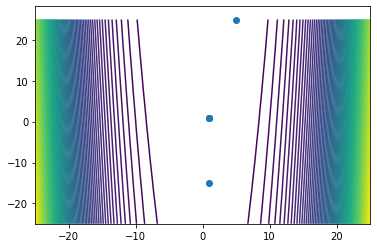

In [10]:
aa0=linspace(-25,25,100)
aa1=linspace(-25,25,100)
Z=[[rosenbrock(array([a0,a1]))for a0 in aa0]for a1 in aa1]
contour(aa0,aa1,Z,100)
x0=[5,5]

xn,L=Newton(x0)
plt.scatter([x[0] for x in L],[x[1] for x in L])

In [1]:
def gradientDFC(F,d,eps=1e-5):
    def deltaF(x):
        g=zeros(d)
        for i in range (d):
            ei=zeros(d)
            ei[i]=1
            g[i]=(F(x+eps*ei)-F(x-eps*ei))/(2*eps)
        return g
    return deltaF

In [9]:
def Hess2(f,eps=1e-10):
    def Hessean(x):
        g=eye(2)
        dF=gradientDFC(f,2,eps=1e-5)
        eps1=[eps,0]
        eps2=[0,eps]
        h=np.divide(dF(np.add(x,eps1))-dF(np.subtract(x,eps1)),2*eps)
        print(h)
        p=np.divide(dF(np.add(x,eps2))-dF(np.subtract(x,eps2)),2*eps)
        g=np.array([h,p])
        return g
    return Hessean
                

In [10]:
hess=Hess2(rosenbrock)
hess([0,2])

[-824.22957459    0.        ]


array([[-824.22957459,    0.        ],
       [   0.        ,  198.95196601]])

//New function

In [96]:
np.array([1,2])-np.array([1,2])

array([0, 0])